In [18]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import pickle
import os, sys

In [19]:
# make sure pandas is version 1.0 or higher
# make sure networkx is verion 2.4 or higher
print(pd.__version__)
print(nx.__version__)

parent_dir = os.path.abspath(os.path.join(os.getcwd(), ".."))
sys.path.insert(0, parent_dir)
# os.chdir("..")

2.2.3
3.4.2


In [20]:
from ema_workbench import (
    Model,
    Policy,
    ema_logging,
    SequentialEvaluator,
    MultiprocessingEvaluator,
)
from dike_model_function import DikeNetwork  # @UnresolvedImport
from problem_formulation import get_model_for_problem_formulation, sum_over, sum_over_time



In [21]:
ema_logging.log_to_stderr(ema_logging.INFO)
os.chdir("/Users/benschaefer/Desktop/epa141-model/final assignment")
print(os.getcwd())
# choose problem formulation number, between 0-5
# each problem formulation has its own list of outcomes
dike_model, planning_steps = get_model_for_problem_formulation(5)

/Users/benschaefer/Desktop/epa141-model/final assignment


In [22]:
# EXP_PATH = "./saved_runs/subspace_experiments.pkl"
# OUT_PATH = "./saved_runs/subspace_outcomes.pkl"
EXP_PATH = "./saved_runs/base_case_exp.pkl"
OUT_PATH = "./saved_runs/base_case_out.pkl"

with open(EXP_PATH, "rb") as file:
    experiments_df = pickle.load(file)
with open(OUT_PATH, "rb") as file:
    outcome_df = pickle.load(file)

In [23]:
outcome_df = pd.DataFrame({k: v.flatten() for k, v in outcome_df.items()})

In [24]:
print(len(outcome_df))

2500


In [25]:
label = 'A.5_Expected Number of Deaths'
# label = "RfR Total Costs"

data = outcome_df[label]
threshold = data.quantile(0.90)
print(threshold)
y = data >= threshold

0.06507743065178646


<Axes: xlabel='Expected flood-related annual deaths ', ylabel='Number of Scenarios'>

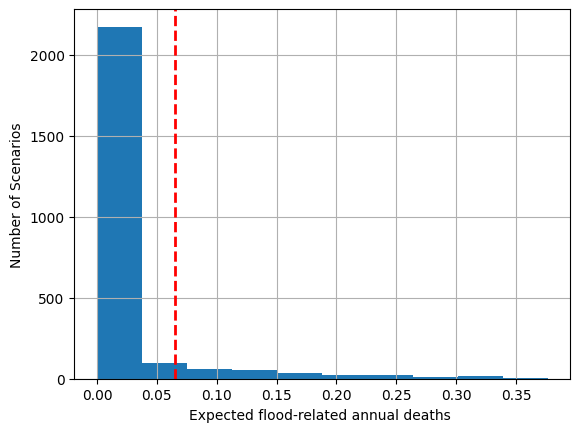

In [26]:
# for col in outcome_df.columns:
# plt.title(f"{col}")
# outcome_df[col].hist()
# plt.show()
# plt.close()

plt.xlabel("Expected flood-related annual deaths ")
plt.ylabel("Number of Scenarios")
plt.axvline(x=threshold, color='red', linestyle='--', linewidth=2)
outcome_df["A.5_Expected Number of Deaths"].hist()
#.sort_values(ascending=False).head()
# plt.show()
# plt.close()

In [27]:
cleaned_experiments = experiments_df.drop(labels=[l.name for l in dike_model.levers], axis=1)

In [28]:
np.sum(y)

np.int64(250)

In [29]:
y = np.array(y)

In [30]:
from ema_workbench.analysis import prim
from ema_workbench.analysis import scenario_discovery_util as sdutil

prim_alg = prim.Prim(cleaned_experiments,y, threshold=0.5)
box1 = prim_alg.find_box()

[MainProcess/INFO] column policy dropped from analysis because it has only one category
[MainProcess/INFO] column model dropped from analysis because it has only one category
[MainProcess/INFO] 2500 points remaining, containing 250 cases of interest


binary


[MainProcess/INFO] mean: 0.9615384615384616, mass: 0.052, coverage: 0.5, density: 0.9615384615384616 restricted_dimensions: 5


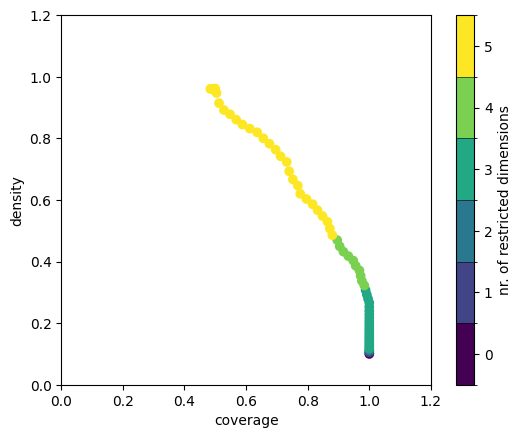

In [31]:
box1.show_tradeoff()
plt.show()

In [32]:
# box1.peeling_trajectory[box1.peeling_trajectory["res_dim"] == 4]

In [33]:
# box1.select(54)

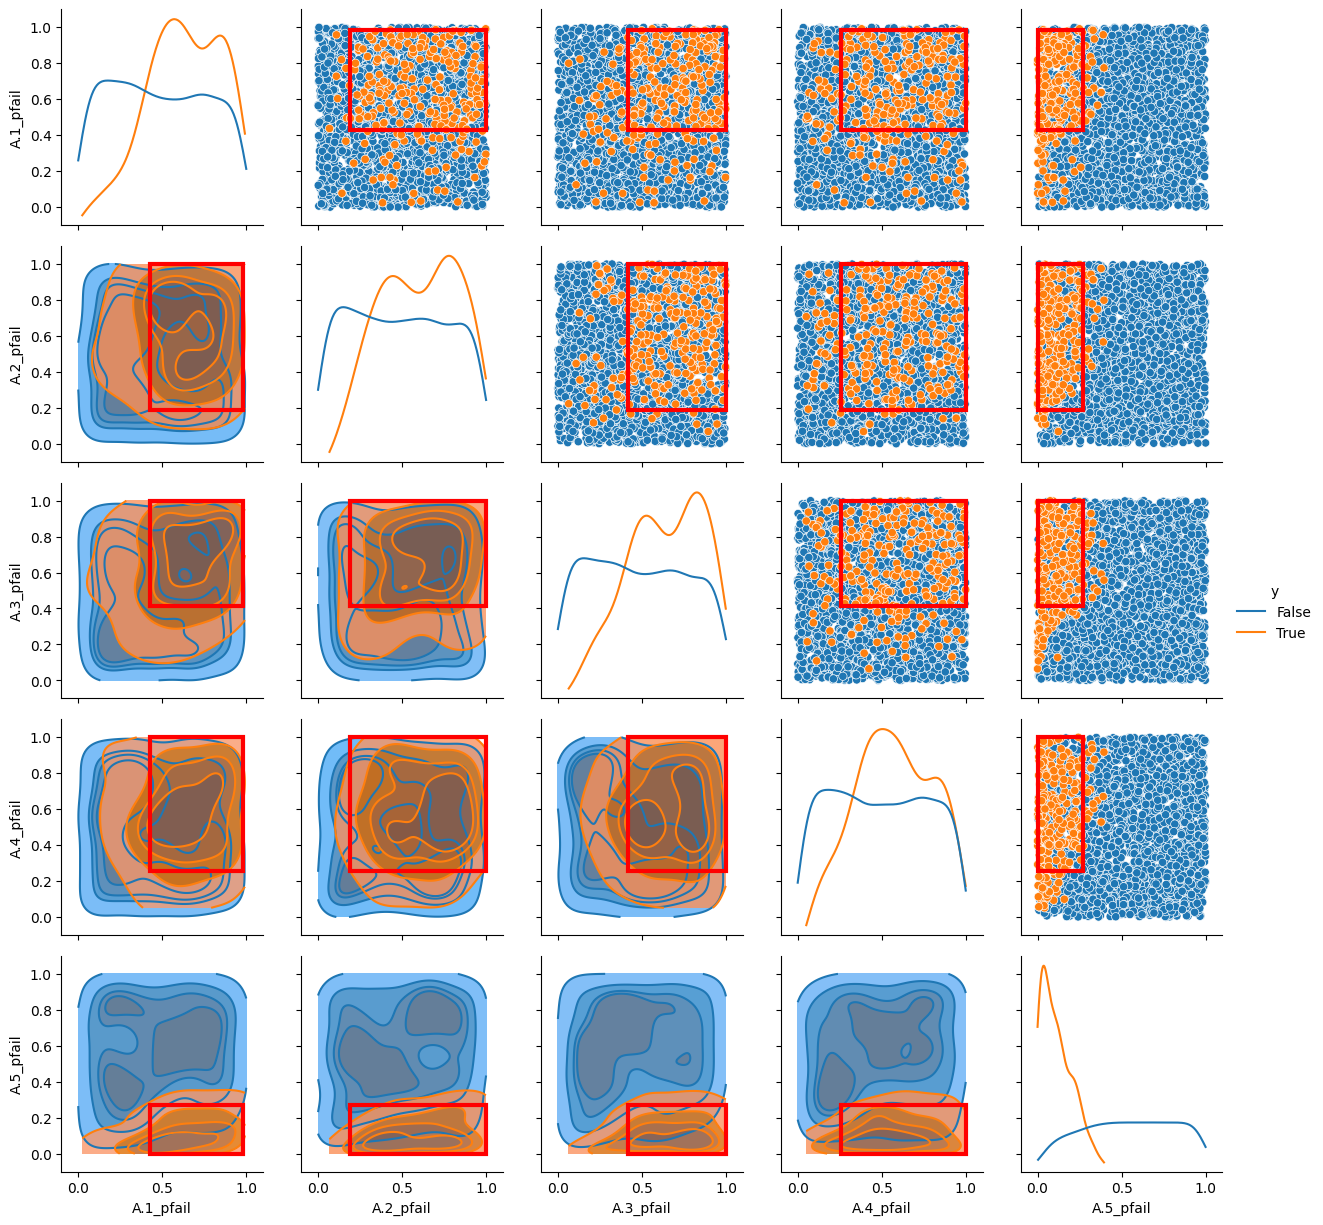

In [34]:
box1.show_pairs_scatter()

[<Figure size 640x480 with 1 Axes>]

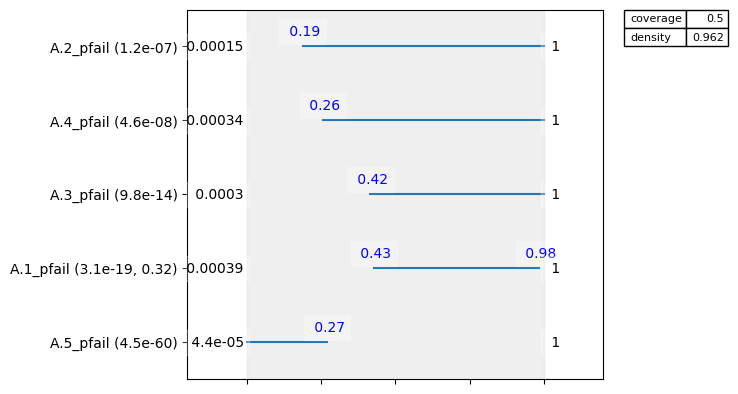

In [35]:
box1.inspect(style="graph")

[MainProcess/INFO] policy dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category


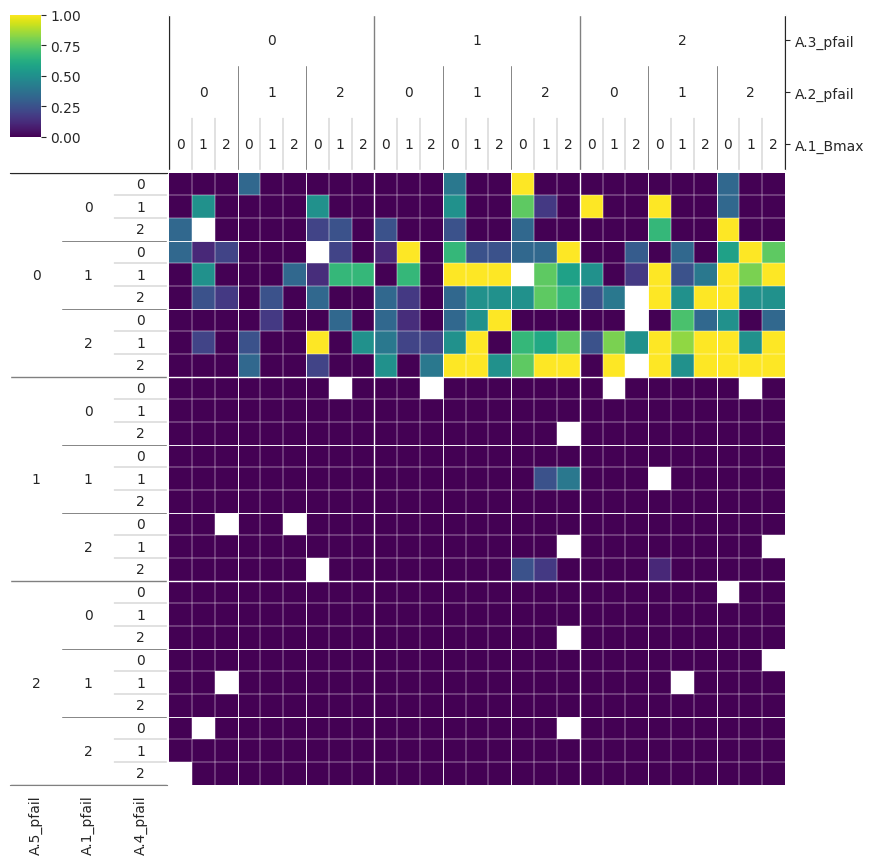

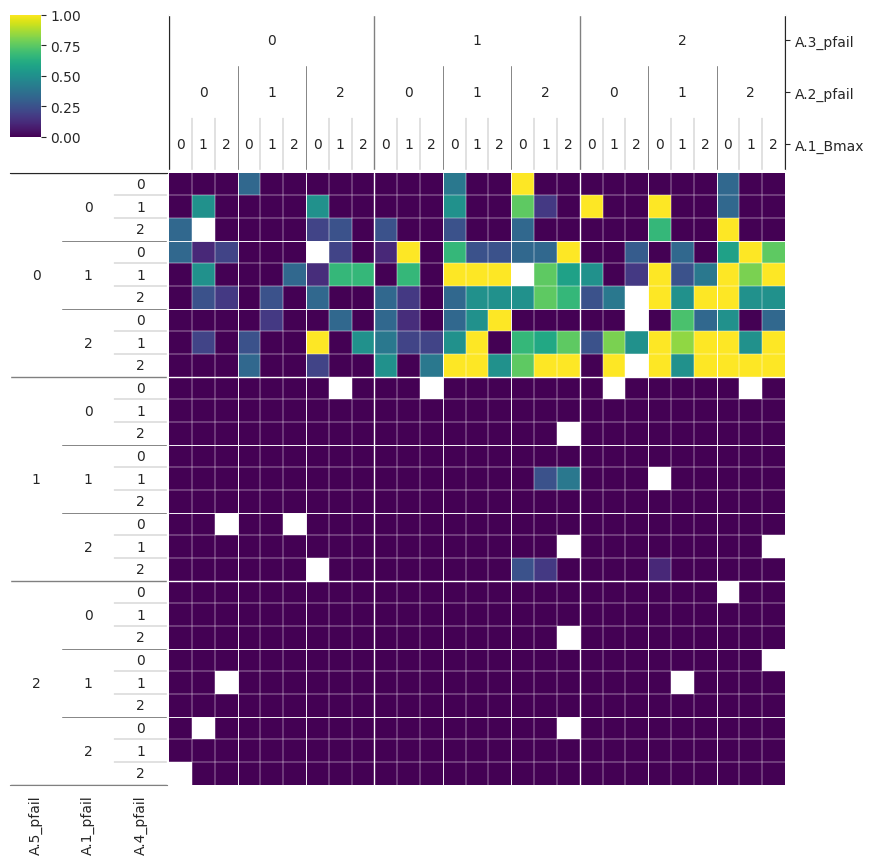

In [36]:
from ema_workbench.analysis import dimensional_stacking
dimensional_stacking.create_pivot_plot(cleaned_experiments, y)

In [38]:
outcome_df["A.5_Expected Number of Deaths"]
outcome_df.sort_values(by="A.5_Expected Number of Deaths",ascending=False)

,A.1_Expected Annual Damage,A.1_Dike Investment Costs,A.1_Expected Number of Deaths,A.2_Expected Annual Damage,A.2_Dike Investment Costs,A.2_Expected Number of Deaths,A.3_Expected Annual Damage,A.3_Dike Investment Costs,A.3_Expected Number of Deaths,A.4_Expected Annual Damage,A.4_Dike Investment Costs,A.4_Expected Number of Deaths,A.5_Expected Annual Damage,A.5_Dike Investment Costs,A.5_Expected Number of Deaths,RfR Total Costs,Expected Evacuation Costs
1743,0.000000e+00,0,0.000000,6.792974e+06,0,0.009491,3.953716e+07,0,0.101292,1.787621e+06,0,0.001307,3.110815e+08,0,0.376633,0.0,0.0
1213,2.000775e+07,0,0.020468,2.050089e+07,0,0.027618,9.691694e+06,0,0.024991,4.651196e+06,0,0.003283,3.104018e+08,0,0.375680,0.0,0.0
226,1.098588e+08,0,0.065794,8.363984e+06,0,0.006839,6.539040e+07,0,0.099736,2.132167e+05,0,0.000088,5.045849e+08,0,0.364646,0.0,0.0
199,6.195701e+07,0,0.037532,7.211029e+07,0,0.056630,0.000000e+00,0,0.000000,0.000000e+00,0,0.000000,4.949577e+08,0,0.356627,0.0,0.0
1669,1.318766e+08,0,0.129423,0.000000e+00,0,0.000000,0.000000e+00,0,0.000000,0.000000e+00,0,0.000000,2.956290e+08,0,0.355109,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2476,1.661189e+09,0,0.657367,0.000000e+00,0,0.000000,3.657106e+08,0,0.354876,0.000000e+00,0,0.000000,0.000000e+00,0,0.000000,0.0,0.0
2477,6.307572e+08,0,0.359522,3.192192e+07,0,0.024556,0.000000e+00,0,0.000000,0.000000e+00,0,0.000000,0.000000e+00,0,0.000000,0.0,0.0
2478,5.509721e+08,0,0.516854,2.309495e+08,0,0.270853,0.000000e+00,0,0.000000,0.000000e+00,0,0.000000,0.000000e+00,0,0.000000,0.0,0.0
2480,1.665974e+09,0,0.659750,0.000000e+00,0,0.000000,7.676727e+07,0,0.075323,0.000000e+00,0,0.000000,0.000000e+00,0,0.000000,0.0,0.0


In [56]:
worst_case_row = experiments_df.iloc[1743]
worst_case_outcome = outcome_df.iloc[1743]


In [58]:

for label in worst_case_row.index.copy():
    if "RfR" in label:
        worst_case_row.drop(label, inplace=True)
    if "DikeIncrease" in label:
        worst_case_row.drop(label, inplace=True)
    
    # worst_case_row.drop("scenario", inplace=True)
    # worst_case_row.drop("policy", inplace=True)
    # worst_case_row.drop("EWS_DaysToThreat", inplace=True)

print(os.getcwd())

with open("./saved_runs/reference_cases/worst_case.pkl", "wb") as file:
    pickle.dump(pd.concat([worst_case_row, worst_case_outcome]), file)

print(worst_case_row)

/Users/benschaefer/Desktop/epa141-model/final assignment
A.0_ID flood wave shape            96
A.1_Bmax                   303.445775
A.1_Brate                        10.0
A.1_pfail                    0.952233
A.2_Bmax                   304.523026
A.2_Brate                        10.0
A.2_pfail                     0.78126
A.3_Bmax                   145.567255
A.3_Brate                         1.5
A.3_pfail                    0.585326
A.4_Bmax                   273.009272
A.4_Brate                         1.0
A.4_pfail                    0.637839
A.5_Bmax                   256.793847
A.5_Brate                         1.0
A.5_pfail                    0.018696
discount rate 0                   4.5
EWS_DaysToThreat                    0
scenario                         1743
policy                     Do Nothing
model                        dikesnet
Name: 1743, dtype: object


## Sobol